## Проектная работа. Дополнительная практика. Интернет-магазин "Стримчик"
Предметом исследования является интернет-магазин "Стримчик". Магазин продает компьютерные игры по всему миру. Необходимо выявить ключевые факторы, определяющие успех игры. Это поможет сделать ставку на потенциально популярные продукты и разработать эффективные стратегии маркетинга на 2017 год.

### Цель работы
Целью исследования является выявление закономерностей, определяющих успешность компьютерных игр, с целью планирования рекламных кампаний в интернет-магазине "Стримчик".

### Ход работы
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Данные имеются до 2016 года (представим что сейчас 2016 год). Данные за 2016 год могут быть неполными. О качестве данных нет никакой информации. Поэтому прежде чем приступить к анализу, понадобиться обзор данных, чтобы полученные в конечном итоге результаты были достоверны
###### Примечание к данным:
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Поэтому мое исследование будет иметь следующий порядок действий:
1. Загрузка данных
2. Подготовка данных: замена названий столбцов, преобразование типов данных, обработка пропусков и аббревиатуры 'tbd', подсчет суммарных продаж.
3. Исследовательский анализ данных: анализ выпуска игр по годам, изменения продаж по платформам, выбор актуального периода, анализ популярных платформ, влияние отзывов на продажи, распределение игр по жанрам.
4. Составление портрета пользователя: определение предпочтений пользователей в разных регионах, влияние рейтинга ESRB на продажи.
5. Проверка гипотез: сравнение средних пользовательских рейтингов платформ и жанров.
6. Формулирование общего вывода: суммирование результатов и выводов проекта для принятия решений.

Для начала импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats as st
!pip install mplcursors
import mplcursors

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
try:
    df_games = pd.read_csv('games.csv')
except:
    df_games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

Изучим же датафрейм:

In [3]:
def datafraim_print_info(datafraim):
    print(datafraim.info())
    display(datafraim.head(10))

In [4]:
datafraim_print_info(df_games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
def check_columns(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())

check_columns(df_games)

Уникальные значения столбца Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Уникальные значения столбца Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Уникальные значения столбца Year_of_Release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Уникальные значения столбца Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Уникальные значения столбца NA_sales
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 

Посмотрим на количество пропусков:

In [6]:
display(pd.DataFrame(df_games.isna().sum()).sort_values(by = 0).style.background_gradient('coolwarm'))

,0
Platform,0
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Name,2
Genre,2
Year_of_Release,269
User_Score,6701
Rating,6766


Интересными кажутся пропуски с отсутствием названия игры, просмотрим что это за строки:

In [7]:
df_games[df_games['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Проверим, минимальные даты выхода игр по платформам (чтобы не было такого чтобы игра вышла раньше платформы):

In [8]:
df_games.groupby('Platform')['Year_of_Release'].min()

Platform
2600    1980.0
3DO     1994.0
3DS     2011.0
DC      1998.0
DS      1985.0
GB      1988.0
GBA     2000.0
GC      2001.0
GEN     1990.0
GG      1992.0
N64     1996.0
NES     1983.0
NG      1993.0
PC      1985.0
PCFX    1996.0
PS      1994.0
PS2     2000.0
PS3     2006.0
PS4     2013.0
PSP     2004.0
PSV     2011.0
SAT     1994.0
SCD     1993.0
SNES    1990.0
TG16    1995.0
WS      1999.0
Wii     2006.0
WiiU    2012.0
X360    2005.0
XB      2000.0
XOne    2013.0
Name: Year_of_Release, dtype: float64

Замечена аномалия у платформы ds. Судя по всему речь идет о платформе nintendo ds, которая вышла в 2004 году. Посмотрим какие игры выходили на нее раньше 2004 года

In [9]:
df_games[(df_games['Year_of_Release']<2004) & (df_games['Platform']=='DS')]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN


Как можно заметить, здесь действительно аномалия. Поскольку игра выходила на DS в 2004 году

### Промежуточный вывод по шагу 1:
1. Были выгружены данные до 2016 года (данные за 2016 неполные)
2. Пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Эти пропуски могут быть вызваны разными факторами, такими как отсутствие информации, ошибки при сборе данных или несовершенства в базе данных.
3. Аномалия "tbd" (to be defined) в столбце User_Score. Это означает, что оценка пользователей еще не определена или недоступна на момент сбора данных. Это нормальное явление для компьютерных игр, поскольку оценка может быть получена только после того, как игра будет оценена достаточным количеством пользователей.
4. Неправильный тип данных в столбце Year_of_Release. Год выпуска игры должен быть целым числом, что требует коррекции типа данных. Также неправильный тип данных имеет колонка User_Score (но это связано с аномалией tbd, что мы скорректируем в будущем), а также колонка critic_score (Потому что судя по уникальным значениям, все значения целочисленные и не требуют вещественный тип данных)
5. Обнаружены две строки с пропусками в столбцах Name и Genre (строки 659 и 14244), при этом информация о годе и платформе указывает на то, что это одна и та же игра. Вероятно, данные о продажах были получены только для определенных регионов, что привело к разделению информации на две строки.
6. Обнаружено аномальное значение для платформы DS
7. Название колонок находятся в верхнем регистре, что достаточно неудобно

Данные требуют предобработки

## Шаг 2. Подготовьте данные

Для последующего удобства, приведем названия колонок к нижнему регистру:

In [10]:
df_games.columns = df_games.columns.str.lower()
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Необходимо внести следующие изменения в столбцы:
- Преобразовать столбцы year_of_release и critic_score в целочисленный тип данных.
- Преобразовать столбец user_score в числовой тип данных с плавающей точкой. Значение "tbd" означает, что на момент выгрузки данных оценка еще не была определена, поэтому эти значения следует заменить на пропущенные значения (NaN).

In [11]:
df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], downcast='integer')
df_games['critic_score'] = pd.to_numeric(df_games['critic_score'], downcast='integer')

Перейдем к колонке user_score. Изучив что означает значение tbd на просторах интернета было выявлено, что эта аббревиатура расшифровывается как "To Be Determined". Она используется в случае, когда для игры недостаточно отзывов (менее 4) для расчета рейтинга пользователей и его публикации. Пока что заменим это значение на NaN и поменяем тип колонки

In [12]:
df_games['user_score'] = df_games['user_score'].replace('tbd', np.NaN)
df_games['user_score'] = df_games['user_score'].astype('float')

Проверим прошло ли изменение колонок

In [13]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Как можно заметить колонки year_of_release и critic_score не изменили своих типов. Это связано с пропусками. Поэтому сначала поработаем над пропусками

Займемся пока что заменой пропусков. Посмотрим какие столбцы имеют пропуски:

In [14]:
display(pd.DataFrame(df_games.isna().sum()).sort_values(by = 0).style.background_gradient('coolwarm'))

,0
platform,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
name,2
genre,2
year_of_release,269
rating,6766
critic_score,8578


Как можно заметить пропуски имеют только колонк year_of_release, rating, critic_score и user_score
Предположим почему такие пропуски впринципе могли появится?
1. Critic_Score (оценка критиков):

Гипотеза: Некоторые игры могли быть выпущены до введения системы оценок или без участия критиков, что привело к отсутствию оценок в соответствующих столбцах. Также возможно, что данные были утеряны при экспорте или передаче.

Возможная замена: В этом столбце невозможно выявить общие закономерности по году выпуска или жанру игры. Каждая игра уникальна, и оценка критиков или пользователей является субъективным мнением о конкретной игре, которое зависит от множества факторов, таких как платформа, студия разработчика, издатель, реклама и предыдущие части игры. Учитывая множество факторов, необходимых для учета, восстановление данных является непростой задачей.
2. User_Score (оценка пользователей):

Гипотеза: Пропуски в оценках пользователей могут возникнуть из-за того, что некоторые игры были выпущены до того, как стали собирать данные оценок пользователей, либо из-за неполноты данных в источнике.

Возможная замена: Аналогично как с critic_score

3. Rating (рейтинг от ESRB):

Гипотеза: Пропуски в рейтинге ESRB могут быть следствием отсутствия присвоения рейтинга организацией ESRB для некоторых игр. Это может произойти из-за того, что игра выпущена в регионах, где рейтинг ESRB необязателен, либо из-за отсутствия данных в источнике.

Возможная замена: Заменим значение на 'Неизвестно'

4. Year_of_Release (год выпуска игры):
Гипотеза: Отсутствие информации о годе выпуска игры может быть вызвано неполнотой данных или ошибками в записи. Некоторые игры могли быть выпущены без указания года выпуска, либо год выпуска мог быть утерян в процессе сбора или передачи данных.

Возможная замена: В названии может присутствовать информация о годе. Например, для спортивных игр надо учитывать, что написаный год может означать год конца сезона. Пример FIFA 2004 это про сезон 2003/2004 года по футболу. Значит игру выпускают перед началом сезона, тоесть в 2003. Те года что не удастся восстановить, удалим

Name и genre имеют всего лишь 2 пропуска. Их можно удалить

In [15]:
df_games.drop([659, 14244],inplace=True)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Удалили 2 строки. Перейдем к столбцу rating:

In [16]:
df_games['rating'] = df_games['rating'].fillna('Неизвестно')

Когда мы восстанавливаем или удаляем значения в столбце с годом выпуска игры, мы учитываем наличие года в названии игры. Если в названии игры указан год, то мы анализируем её жанр, чтобы определить год выпуска игры

In [17]:
df_games[df_games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,Неизвестно
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,Неизвестно
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,Неизвестно


In [18]:
def find_year(row):
    year = 0
    last_word = ''
    genre = row[3]
    for word in row[0].split():
        try:
            last_word = word
            year = int(word)
        except:
            continue
    if genre in ('Sports', 'Racing', 'Fighting'):
        if year > 2000 or last_word in ('2K6','2K8'):
            if genre == 'Sports':
                year -=1
            if last_word == '2K6':
                year = 2005
            elif last_word == '2K8':
                year = 2007
            if year < 2017 and np.isnan(row[2]):
                row[2] = year
    return row

df_games = df_games.apply(find_year, axis=1)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16462 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Теперь удалим остальные строки, в которых остались пропуски и поменяем тип колонки на корректный:

In [19]:
df_games = df_games.dropna(subset=['year_of_release'])
df_games['year_of_release'] = df_games['year_of_release'].astype('int')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16462 non-null  object 
 1   platform         16462 non-null  object 
 2   year_of_release  16462 non-null  int64  
 3   genre            16462 non-null  object 
 4   na_sales         16462 non-null  float64
 5   eu_sales         16462 non-null  float64
 6   jp_sales         16462 non-null  float64
 7   other_sales      16462 non-null  float64
 8   critic_score     7997 non-null   float64
 9   user_score       7473 non-null   float64
 10  rating           16462 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Проверим, что остались пропуски только в 2 колонках:

In [20]:
display(pd.DataFrame(df_games.isna().sum()).sort_values(by = 0).style.background_gradient('coolwarm'))

,0
name,0
platform,0
year_of_release,0
genre,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
rating,0
critic_score,8465


На всякий случай, проверим датафрейм на количество явных дубликатов:

In [21]:
print('Число явных дубликатов',df_games.duplicated().sum())

Число явных дубликатов 0


Поиск дубликатов по названию игры, платформе и году.

In [22]:
part_data_games_sales = df_games.loc[:, 'name':'year_of_release']
part_data_games_sales[part_data_games_sales.duplicated() == True]

,name,platform,year_of_release
16230,Madden NFL 13,PS3,2012


Посмотрим как выглядит этот дубликат в исходной таблице:

In [23]:
df_games[df_games['name'] == 'Madden NFL 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Как можно заметить, различия здесь только по продажам в европе. Поэтому предлагаю к строке 604 в продажах в европе добавить 0.1 и удалить строку 16230

In [24]:
df_games.loc[604, 'eu_sales'] = df_games.loc[604, 'eu_sales'] +0.01
df_games.drop([16230],inplace=True)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  int64  
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       7472 non-null   float64
 10  rating           16461 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Перепроверим, что все значение теперь равно 0.23

In [25]:
df_games.loc[604, 'eu_sales']

0.23

Перепроверим, что дубликатов больше нет по названию игры, платформе и году релиза

In [26]:
part_data_games_sales_ = df_games.loc[:, 'name':'year_of_release']
part_data_games_sales_[part_data_games_sales_.duplicated() == True]

,name,platform,year_of_release


Как можно заметить дубликатов по названию игры, платформе и году релиза больше не обнаружено

Скорректируем сразу аномальную дату, которую мы нашли на шаге 1

In [27]:
df_games.loc[df_games['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = df_games.loc[df_games['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'].replace(1985, 2004)

In [28]:
df_games[df_games['name'] == 'Strongest Tokyo University Shogi DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,2004,Action,0.0,0.0,0.02,0.0,NaN,NaN,Неизвестно


Теперь все корректно

Расчитаем отдельный столбец с суммой продаж по всем регионам 'sales_total':

In [29]:
df_games['sales_total'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Неизвестно,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Неизвестно,31.38


Колонка создана успешно!

### Промежуточный вывод по шагу 2
Мы подготовили данные к анализу, выполнив следующие действия:
1. Привели названия столбцов к нижнему регистру.
2. Восстановили пропущенные значения в строках, где это было возможно
3. Удалили строки, не содержащие необходимых данных.
4. Поменяли год выпуска у аномальной игры на Nintendo DS
5. Добавили столбец для подсчета суммарных продаж.

## Шаг 3. Исследовательский анализ данных
Последовательно ответим на вопросы:
1. Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
4. Не учитывайте в работе данные за предыдущие годы.
5. Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
6. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
7. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
8. Соотнесем выводы с продажами игр на других платформах.
9. Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?



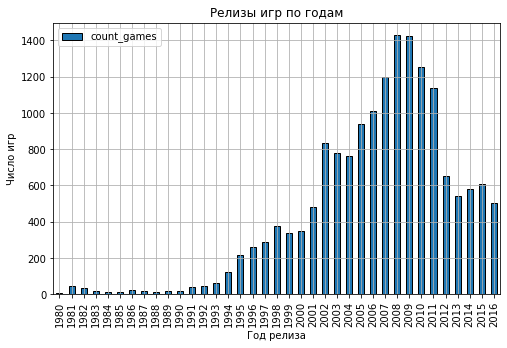

In [30]:
pd.pivot_table(df_games, index='year_of_release', values='name', aggfunc='count').rename(columns = {'name': 'count_games'}).plot(kind='bar', figsize = (8,5), grid = True, ec='black')
plt.title('Релизы игр по годам')
plt.xlabel('Год релиза')
plt.ylabel('Число игр')
plt.legend(loc='upper left')
plt.show()

In [31]:
pd.pivot_table(df_games, index='year_of_release', values='name', aggfunc='count').rename(columns = {'name': 'count_games'}).reset_index()

,year_of_release,count_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,13
6,1986,21
7,1987,16
8,1988,15
9,1989,17


### Вывод по вопросу 1:
С 1980-х до 1993 года индустрия компьютерных игр была маломасштабной, без достаточного внимания качества и оценок. Появление персональных компьютеров и новых технологий программирования привело к увеличению выпуска игр с 1997 по 2002 годы. В 2009 году произошел пик интереса, благодаря распространению игровых движков и доступности новых технологий. Снижение активности с 2012 по 2016 год обусловлено экономическим кризисом и стремлением крупных студий к созданию качественных продуктов.

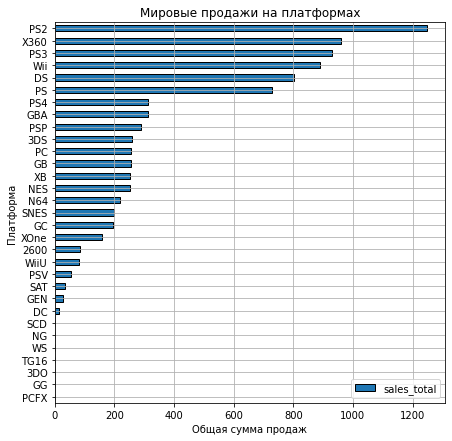

In [32]:
pd.pivot_table(df_games, index=['platform'], values='sales_total', aggfunc='sum').sort_values(by = 'sales_total').plot(kind='barh', figsize = (7,7), grid = True, ec='black')
plt.title('Мировые продажи на платформах')
plt.xlabel('Общая сумма продаж')
plt.ylabel('Платформа')
plt.legend(loc='lower right')
plt.show()

In [33]:
pd.pivot_table(df_games, index=['platform'], values='sales_total', aggfunc='sum').sort_values(by = 'sales_total', ascending = False)

,sales_total
platform,
PS2,1247.53
X360,961.30
PS3,931.34
Wii,891.18
DS,802.79
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.69


Давайте выберем топ-6 вместо топ-5, потому что нам необходимо учесть консоль PS в наших исследованиях. Топ-6 также близок к топ-5 по выручке, а разрыв между топ-6 и топ-7 значительно больше. 

In [34]:
bs_platform = list(pd.pivot_table(df_games, index=['platform'], values='sales_total', aggfunc='sum').sort_values(by = 'sales_total', ascending = False).index[:6])
bs_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [35]:
def create_grafics(platforms=bs_platform, query=None):
    %matplotlib notebook
    plt.style.use('tableau-colorblind10') 
    
    ax = plt.gca()
    legend_list = []
    if query == None:
        if platforms == None:
            bbox_y = 1.08
            legend_size = 7
            platforms = games['platform'].unique().tolist()
        else:
            platforms = platforms
            bbox_y = 0.97
            legend_size = 9
    else:
        platforms = df_games.query(query)['platform'].unique().tolist()
        bbox_y = 0.97
        legend_size = 9
        
    for platform in platforms:
        if query == None:
            df_to_plot = df_games.query('platform == @platform')
        else:
            df_to_plot = df_games.query('platform == @platform').query(query)
        lines = df_to_plot.groupby('year_of_release')['sales_total'].sum().plot(x='year_of_release', y='sales_total',
                                                                    style='.-', kind='line', fontsize=10,
                                                                    linewidth=1, label=platform, ax=ax, figsize=(9,5))
        legend_list.append(platform)
    
    ax.set_xlabel('')
   
    ax.legend(legend_list, prop={'size':legend_size}, bbox_to_anchor=(1.0, bbox_y))

    mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label()))

<IPython.core.display.Javascript object>


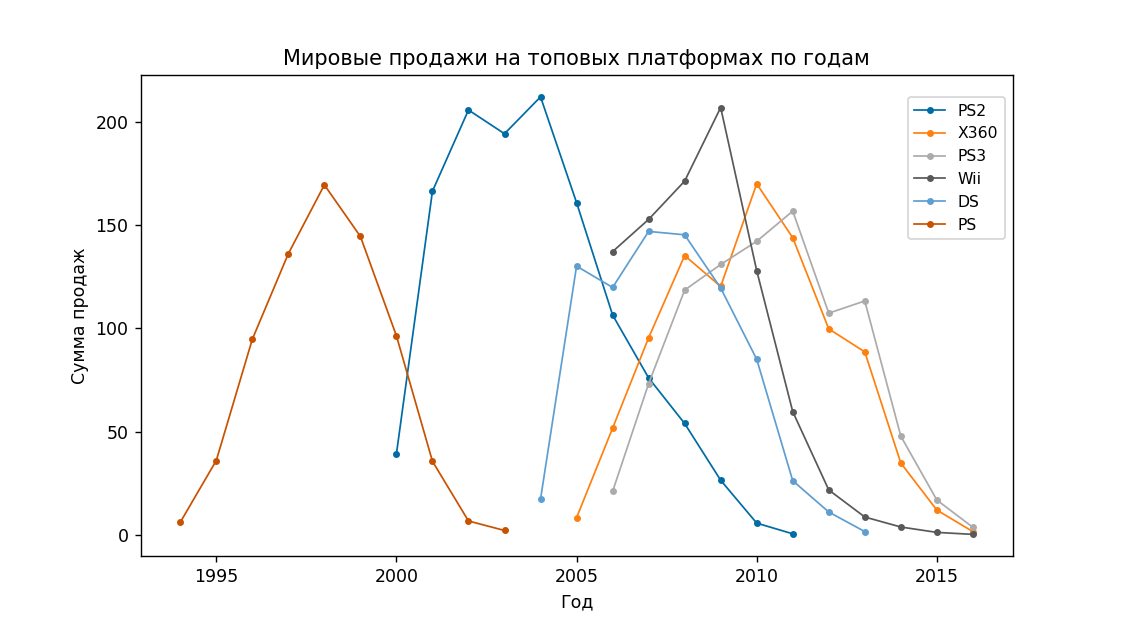

Text(0, 0.5, 'Сумма продаж')

In [36]:
create_grafics()
plt.title('Мировые продажи на топовых платформах по годам')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')

### Вывод по вопросу 2
Давайте проанализируем срок службы игровых консолей.
- Консоль PS выпускалась с 1994 по 2003 год, прожив почти 10 лет.
- PS2 находилась на рынке с 2000 по 2011 годы, продолжительностью 11 лет.
- PS3 вышла в 2006 году и по настоящее время все еще существует, хотя ее популярность снизилась после выпуска PS4 в 2013 году.
- Данные о консоли DS весьма ограничены. Выпущена она была в 2004 году. Пик ее популярности пришелся на 2008 год, а конец срока службы - 2013 год, что составляет 9 лет активного существования.
- Wii была выпущена в 2006 году и до сих пор находится на рынке, но ее популярность начала угасать к 2016 году, что также составляет примерно 10 лет.

Таким образом, в среднем консоли проживают около 10 лет. Однако они могли бы существовать дольше, если бы не появлялись новые модели. Это естественный процесс, так как с течением времени аппаратное обеспечение устаревает и не может обеспечить выполнение новых технических требований игр.

### Вывод по вопросу 3
Считаем актуальным периодом для анализа продаж игр период с 2013 по 2016 год. 
- Введение новой платформы PS4 предполагает ее потенциальное существование на рынке в течение 2-4 лет, с пиком продаж ожидаемым на 2017 год. 
- Наблюдается тренд на рост продаж игр за счет повышения их качества, а не количества. 
- Учитывая, что большинство игр разрабатывается в течение 2-4 лет, игры, выпущенные в 2017 году, начали разрабатываться с 2013 года. Качественные игры имеют потенциал для успешных продаж в течение нескольких лет после выпуска.

In [37]:
last_games = df_games.query('year_of_release > 2012')
last_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  sales_total      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


In [38]:
last_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Неизвестно,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Неизвестно,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Неизвестно,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Неизвестно,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Неизвестно,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Неизвестно,0.01


Давайте выявим платформы с наибольшей прибылью за последние годы.

In [39]:
pd.pivot_table(last_games, index=['platform','year_of_release'], values='sales_total', aggfunc = 'sum')

sales_total
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

In [40]:
pd.pivot_table(last_games, index='platform', values='sales_total', aggfunc = 'sum').sort_values(by = 'sales_total', ascending = False)

,sales_total
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


### Вывод по вопросу 5
Топ-5 платформ по мировым продажам включает в себя PS4, PS3, XOne, X360 и 3DS. За последние три года их общая выручка составила около 1 миллиарда долларов.

Продажи растут для PS4, XOne, 3DS, WiiU и PSV, поскольку они заменяют предыдущее поколение игровых консолей. С другой стороны, продажи старых платформ, таких как PS3, X360, DS, Wii и PSP, снижаются. Также можно отметить увеличение продаж игр для ПК.

Потенциально прибыльными считаю платформы PS4, XOne, 3DS, WiiU и PSV

In [41]:
def create_boxplot(title=None, query_condition = None, ylims=None):
    %matplotlib inline
    if query_condition == None:
        ax = last_games.boxplot(column='sales_total', fontsize=15, figsize=(10,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5), 
                                         notch=True)
    else:
        df_query = last_games.query(query_condition)
        by_column = query_condition.split()[0]
        ax = df_query.boxplot(column='sales_total', by=by_column, fontsize=15, figsize=(10,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True)
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=15, fontweight='bold')

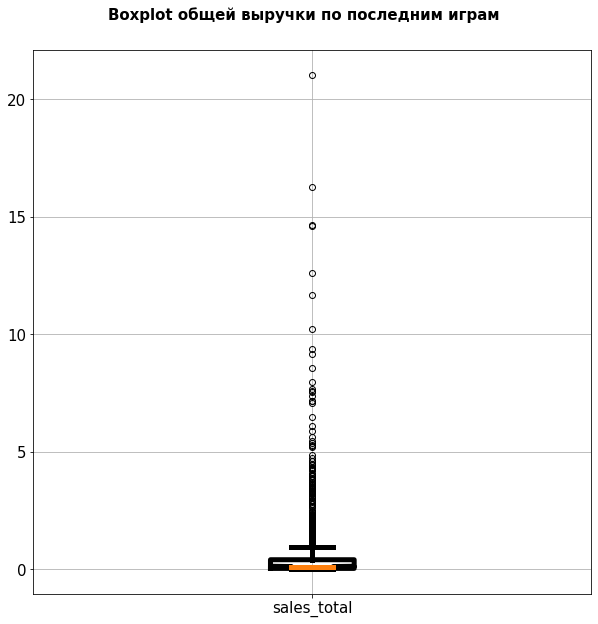

In [42]:
create_boxplot('Boxplot общей выручки по последним играм')

In [43]:
last_games['sales_total'].describe()

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: sales_total, dtype: float64

In [44]:
top_platform = last_games['platform'].unique()
top_platform

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

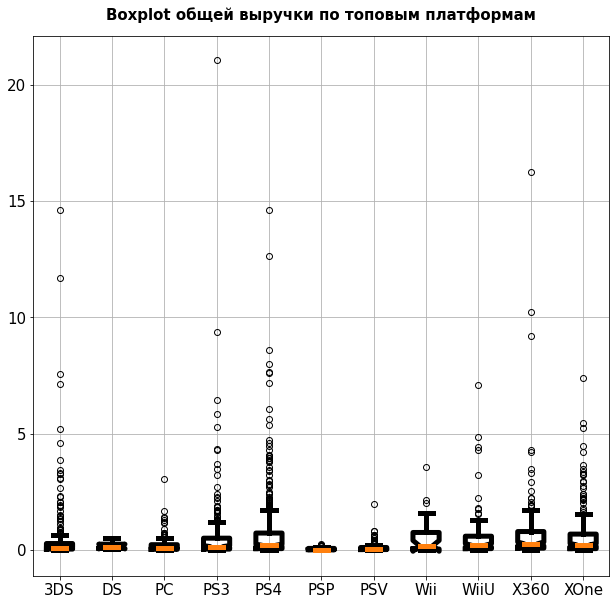

In [45]:
create_boxplot('Boxplot общей выручки по топовым платформам', query_condition="platform in @top_platform")

### Вывод по 6 вопросу
В период с 2013 по 2016 годы заметна значительная разница в продажах игр. Несколько крайне популярных игр продаются долгое время, принося значительную прибыль, в то время как большинство игр не преодолевают порог в 400 тысяч долларов за выбранный период.

Средняя выручка на одну игру по всему миру составляет 488 тысяч долларов. Три четверти игр принесли менее 400 тысяч долларов, а рекордная выручка составила 21 миллион долларов.

Для различных платформ средняя выручка на игру различается:
- На PS4 она составляет 801 тысяч долларов, превышая среднюю по всему миру. Три четверти игр на этой платформе заработали до 730 тысяч долларов, а рекордная выручка составила 14,6 миллиона долларов.
- PS3 имеет среднюю выручку на игру в размере 526 тысяч долларов, примерно на уровне общемировой средней. Три четверти игр заработали до 510 тысяч долларов, а рекордная выручка составила 21 миллион долларов.
- XOne имеет среднюю выручку на игру в размере 645 тысяч долларов, превышающую среднюю по всему миру. Три четверти игр на этой платформе заработали до 685 тысяч долларов, а рекордная выручка составила 7,4 миллиона долларов.
- X360 имеет среднюю выручку на игру в размере 735 тысяч долларов, превышающую среднюю по всему миру. Три четверти игр заработали до 795 тысяч долларов, а рекордная выручка составила 16,3 миллиона долларов.
- 3DS имеет среднюю выручку на игру в размере 472 тысяч долларов, примерно на уровне общемировой средней. Три четверти игр заработали до 280 тысяч долларов, а рекордная выручка составила 14,6 миллиона долларов.
- Тенденция к росту продаж заметна для PS4, PS3 и 3DS, где средняя выручка превышает третий квартиль, указывая на более популярные и продаваемые игры на этих платформах по сравнению с XOne и X360.

Для вопроса 7 в качестве популярной платформы выберем ps4

In [46]:
PS4_last_games = last_games.query('platform == "PS4"')
PS4_last_games.loc[:, ['sales_total', 'critic_score', 'user_score']].corr()

,sales_total,critic_score,user_score
sales_total,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


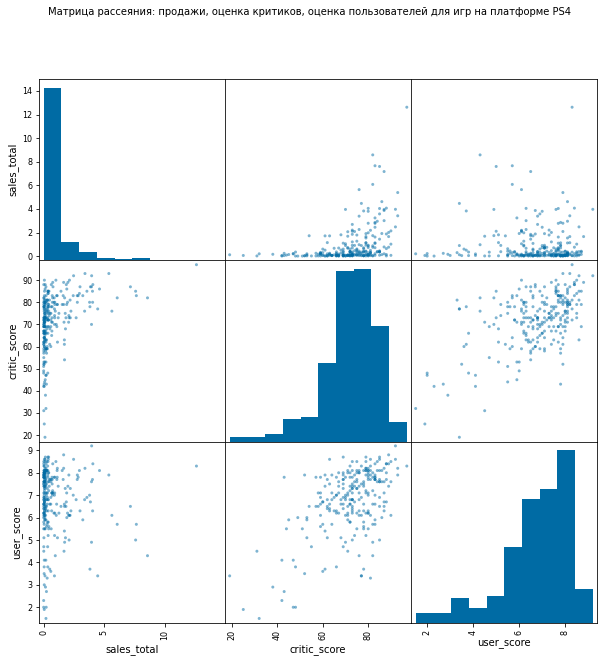

In [47]:
pd.plotting.scatter_matrix(PS4_last_games.loc[:, ['sales_total', 'critic_score', 'user_score']], figsize=(10, 10))
plt.suptitle('Матрица рассеяния: продажи, оценка критиков, оценка пользователей для игр на платформе PS4', fontsize=10)
plt.show()

### Вывод по 7 вопросу 
Для платформы PS4 ключевым фактором является качество игры, которое сильно влияет на ее прибыль. Наблюдается прямая корреляция между выручкой и оценкой критиков. Влияние оценки пользователей обычно незначительно.

Интересно отметить, что мнение игроков часто зависит от оценки критиков. То есть, чем выше рейтинг критиков, тем выше вероятность того, что игроки также высоко оценят игру.

In [48]:
def correl(dataframe, platform):
    display( dataframe.query('platform == @platform').loc[:, ['sales_total', 'critic_score', 'user_score']].corr())
    pd.plotting.scatter_matrix(dataframe.query('platform == @platform').loc[:, ['sales_total', 'critic_score', 'user_score']], figsize=(10, 10))

,sales_total,critic_score,user_score
sales_total,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


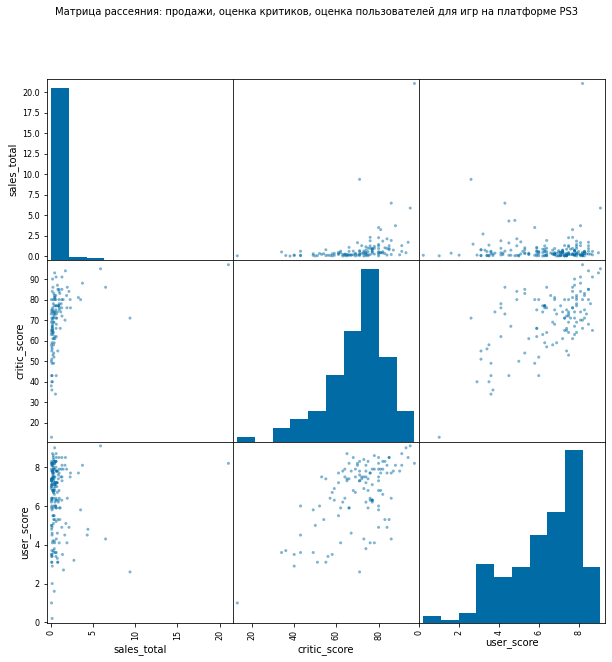

In [49]:
correl(last_games, 'PS3')
plt.suptitle('Матрица рассеяния: продажи, оценка критиков, оценка пользователей для игр на платформе PS3', fontsize=10)
plt.show()

,sales_total,critic_score,user_score
sales_total,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


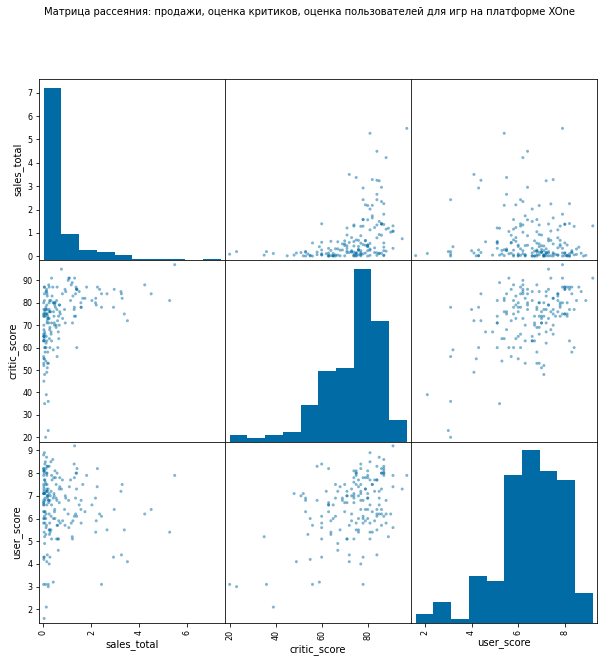

In [50]:
correl(last_games, 'XOne')
plt.suptitle('Матрица рассеяния: продажи, оценка критиков, оценка пользователей для игр на платформе XOne', fontsize=10)
plt.show()

,sales_total,critic_score,user_score
sales_total,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


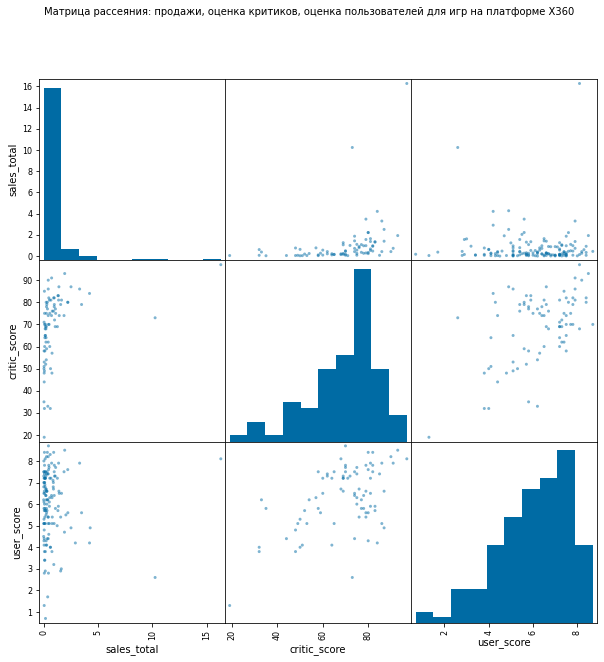

In [51]:
correl(last_games, 'X360')
plt.suptitle('Матрица рассеяния: продажи, оценка критиков, оценка пользователей для игр на платформе X360', fontsize=10)
plt.show()

,sales_total,critic_score,user_score
sales_total,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


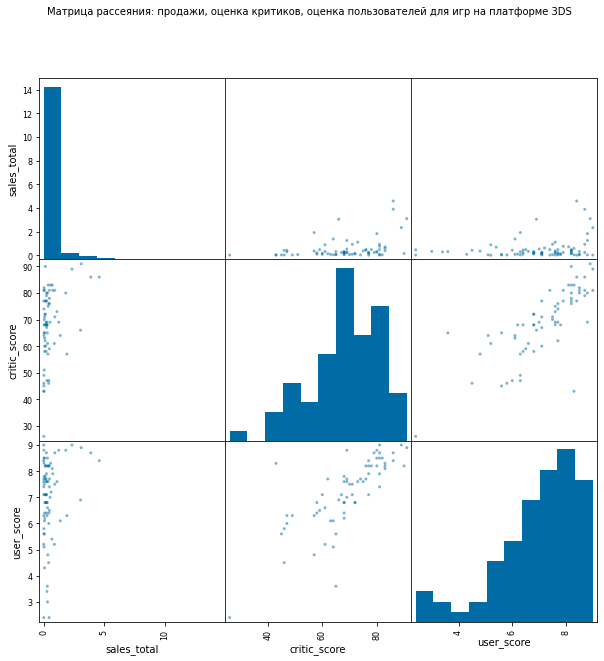

In [52]:
correl(last_games, '3DS')
plt.suptitle('Матрица рассеяния: продажи, оценка критиков, оценка пользователей для игр на платформе 3DS', fontsize=10)
plt.show()

### Вывод по 8 вопросу
Платформы PS3, XOne и X360 демонстрируют схожие взаимосвязи, аналогичные тем, что наблюдаются у PS4.

Однако 3DS выделяется: ее продажи в значительной степени зависят от оценок игроков, хотя связь не столь сильная. Возможно, это связано с лучшей системой рейтинга игр и обратной связи среди игроков. Возможно, игры на этой платформе более популярны и увлекательны, хотя их количество может быть меньше по сравнению с другими платформами

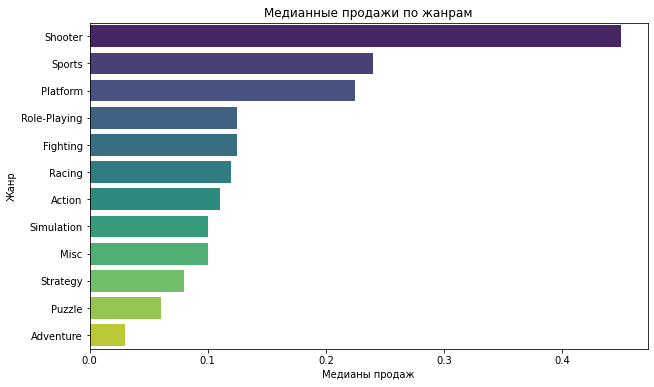

,sales_total
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


In [53]:
genre_sales = pd.pivot_table(last_games, index='genre', values='sales_total', aggfunc='median').sort_values('sales_total', ascending=False)

# Визуализация медианных продаж по жанрам
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sales['sales_total'], y=genre_sales.index, palette='viridis')
plt.title('Медианные продажи по жанрам')
plt.xlabel('Медианы продаж')
plt.ylabel('Жанр')
plt.show()

display(genre_sales)

### Вывод по 9 вопросу
На основании таблицы с медианными значениями продаж по разным жанрам видно следующее:
1. Жанр шутер лидирует по медианным продажам с значением 0.45.
2. За ним следуют жанр спорт (0.24) и платформы (0.225).
3. Role-Playing, Fighting и Racing имеют примерно одинаковые медианные продажи, составляющие 0.125 и 0.12 соответственно.
4. Жанры Action, Simulation, Misc и Strategy имеют медианные продажи от 0.1 до 0.08.
5. Наименьшие медианные продажи у жанров Puzzle (0.06) и Adventure (0.03).

Таким образом, можно сделать вывод о том, что наиболее прибыльными жанрами игр являются Shooter, Sports и Platform, в то время как жанры Puzzle и Adventure приносят меньше всего дохода.

### Промежуточные выводы по шагу 3
После длительного исследования было выявлено:
1. С 1980-х до 1993 года индустрия компьютерных игр была маломасштабной, без достаточного внимания качества и оценок. Появление персональных компьютеров и новых технологий программирования привело к увеличению выпуска игр с 1997 по 2002 годы. В 2009 году произошел пик интереса, благодаря распространению игровых движков и доступности новых технологий. Снижение активности с 2012 по 2016 год обусловлено экономическим кризисом и стремлением крупных студий к созданию качественных продуктов.
2. В среднем консоли проживают около 10 лет. Однако они могли бы существовать дольше, если бы не появлялись новые модели. Это естественный процесс, так как с течением времени аппаратное обеспечение устаревает и не может обеспечить выполнение новых технических требований игр.
3. Был выбран актуальным для анализа период с 2013 по 2016
4. Топ-5 платформ по мировым продажам включает в себя PS4, PS3, XOne, X360 и 3DS. За последние три года их общая выручка составила около 1 миллиарда долларов.
5. Продажи растут для PS4, XOne, 3DS, WiiU и PSV, поскольку они заменяют предыдущее поколение игровых консолей. С другой стороны, продажи старых платформ, таких как PS3, X360, DS, Wii и PSP, снижаются. Также можно отметить увеличение продаж игр для ПК
6. В период с 2013 по 2016 годы заметна значительная разница в продажах игр. Несколько крайне популярных игр продаются долгое время, принося значительную прибыль, в то время как большинство игр не преодолевают порог в 400 тысяч долларов за выбранный период.
7. Средняя выручка на одну игру по всему миру составляет 488 тысяч долларов. Три четверти игр принесли менее 400 тысяч долларов, а рекордная выручка составила 21 миллион долларов.
8. Мнение игроков часто зависит от оценки критиков. То есть, чем выше рейтинг критиков, тем выше вероятность того, что игроки также высоко оценят игру.
9. Наиболее прибыльными жанрами игр являются Shooter, Sports и Platform, в то время как жанры Puzzle и Adventure приносят меньше всего дохода.

## Шаг 4. Составление портрета пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Прежде всего подготовим данные. Создадим 3 датафрейма, где в зависимости от региона продажи были не нулевые

In [54]:
na_last_games = last_games.query('na_sales > 0')
na_last_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 16 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1309 non-null   object 
 1   platform         1309 non-null   object 
 2   year_of_release  1309 non-null   int64  
 3   genre            1309 non-null   object 
 4   na_sales         1309 non-null   float64
 5   eu_sales         1309 non-null   float64
 6   jp_sales         1309 non-null   float64
 7   other_sales      1309 non-null   float64
 8   critic_score     809 non-null    float64
 9   user_score       974 non-null    float64
 10  rating           1309 non-null   object 
 11  sales_total      1309 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 132.9+ KB


In [55]:
eu_last_games = last_games.query('eu_sales > 0')
eu_last_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1422 non-null   object 
 1   platform         1422 non-null   object 
 2   year_of_release  1422 non-null   int64  
 3   genre            1422 non-null   object 
 4   na_sales         1422 non-null   float64
 5   eu_sales         1422 non-null   float64
 6   jp_sales         1422 non-null   float64
 7   other_sales      1422 non-null   float64
 8   critic_score     872 non-null    float64
 9   user_score       1047 non-null   float64
 10  rating           1422 non-null   object 
 11  sales_total      1422 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 144.4+ KB


In [56]:
jp_last_games = last_games.query('jp_sales > 0')
jp_last_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1187 non-null   object 
 1   platform         1187 non-null   object 
 2   year_of_release  1187 non-null   int64  
 3   genre            1187 non-null   object 
 4   na_sales         1187 non-null   float64
 5   eu_sales         1187 non-null   float64
 6   jp_sales         1187 non-null   float64
 7   other_sales      1187 non-null   float64
 8   critic_score     410 non-null    float64
 9   user_score       462 non-null    float64
 10  rating           1187 non-null   object 
 11  sales_total      1187 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 120.6+ KB


Выявим, какая платформа была популярна в том или ином регионе:

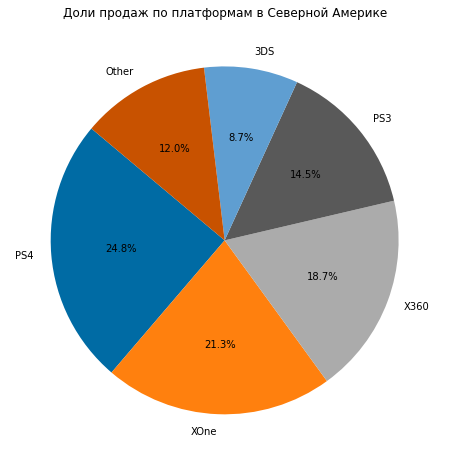

In [58]:
platform_sales_na = na_last_games.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
top_platforms = platform_sales_na.head(5)
other_platforms = pd.DataFrame({'na_sales': platform_sales_na[5:]['na_sales'].sum()}, index=['Other'])
platform_sales_combined = pd.concat([top_platforms, other_platforms])
plt.figure(figsize=(8, 8))
plt.pie(platform_sales_combined['na_sales'], labels=platform_sales_combined.index, autopct='%1.1f%%', startangle=140)
plt.title('Доли продаж по платформам в Северной Америке')
plt.show()

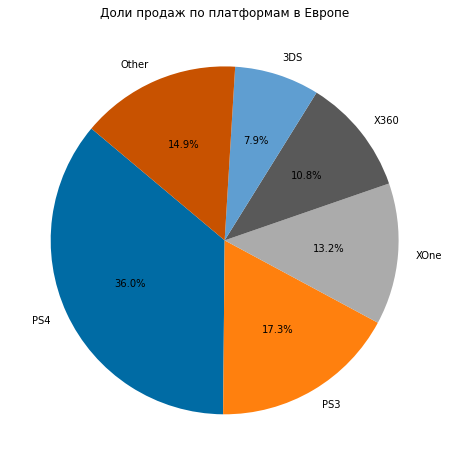

In [59]:
platform_sales_eu = eu_last_games.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
top_platforms = platform_sales_eu.head(5)
other_platforms = pd.DataFrame({'eu_sales': platform_sales_eu[5:]['eu_sales'].sum()}, index=['Other'])
platform_sales_combined = pd.concat([top_platforms, other_platforms])
plt.figure(figsize=(8, 8))
plt.pie(platform_sales_combined['eu_sales'], labels=platform_sales_combined.index, autopct='%1.1f%%', startangle=140)
plt.title('Доли продаж по платформам в Европе')
plt.show()

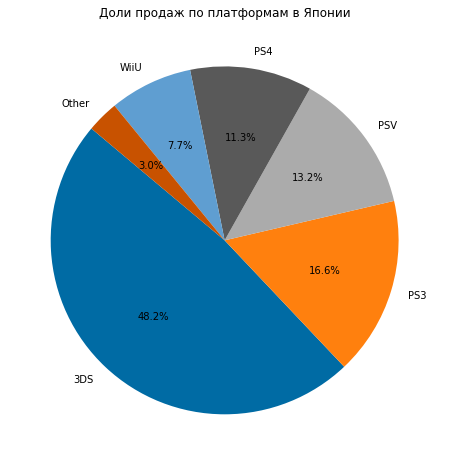

In [60]:
platform_sales_jp = jp_last_games.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
top_platforms = platform_sales_jp.head(5)
other_platforms = pd.DataFrame({'jp_sales': platform_sales_jp[5:]['jp_sales'].sum()}, index=['Other'])
platform_sales_combined = pd.concat([top_platforms, other_platforms])
plt.figure(figsize=(8, 8))
plt.pie(platform_sales_combined['jp_sales'], labels=platform_sales_combined.index, autopct='%1.1f%%', startangle=140)
plt.title('Доли продаж по платформам в Японии')
plt.show()

Рейтинг платформ:
- Топ 5 по Северной Америке: PS4, XOne, X360, PS3 и 3DS, что составляет 75,2% от общего числа продаж в регионе
- Топ 5 по Европейскому региону: PS4, PS3, XOne, X360 и 3DS, что составляет 64% от общего числа продаж в регионе
- Топ 5 по Японии: 3DS, PS3, PSV, PS4 и WiiU, что составляет 51,8% от общего числа продаж в регионе

В рейтинге платформ преобладает влияние компании-производителя. Продукция Sony занимает лидирующие позиции во всех регионах. Кроме того, местоположение компаний также оказывает влияние: на американском рынке предпочтение отдается продукции Microsoft, в то время как в Японии Nintendo имеет сильное присутствие. В Европе покупатели оценивают общую популярность платформы. Конкуренция между PS4 и XOne ярко проявляется в Северной Америке, в то время как в Европе и Японии наблюдается более равная конкуренция между несколькими крупными производителями.

Выявим топ 5 жанров для каждого региона

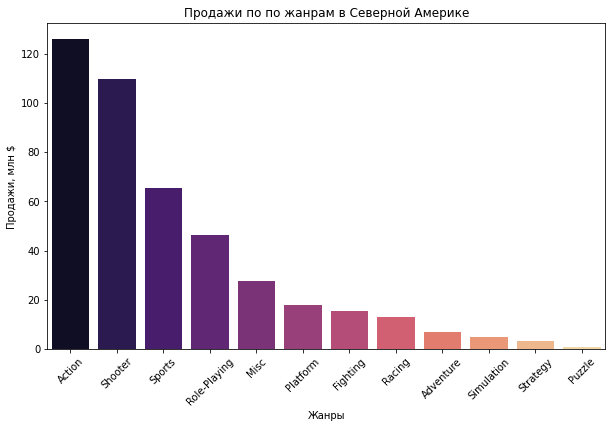

In [61]:
na_genre_sales = pd.pivot_table(na_last_games, index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=na_genre_sales.index, y='na_sales', data=na_genre_sales, palette='magma')
plt.title('Продажи по по жанрам в Северной Америке')
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн $')
plt.xticks(rotation=45)
plt.show()

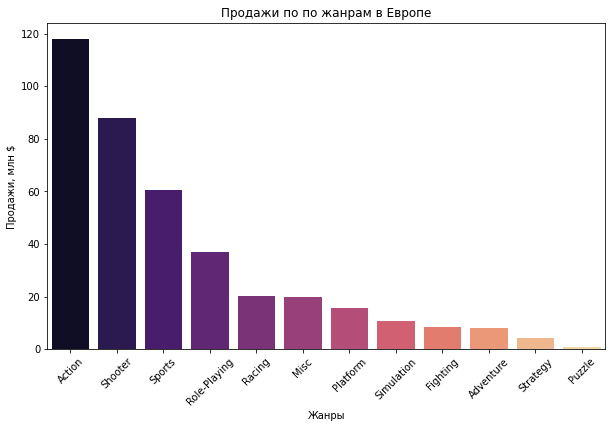

In [62]:
eu_genre_sales = pd.pivot_table(eu_last_games, index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=eu_genre_sales.index, y='eu_sales', data=eu_genre_sales, palette='magma')
plt.title('Продажи по по жанрам в Европе')
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн $')
plt.xticks(rotation=45)
plt.show()

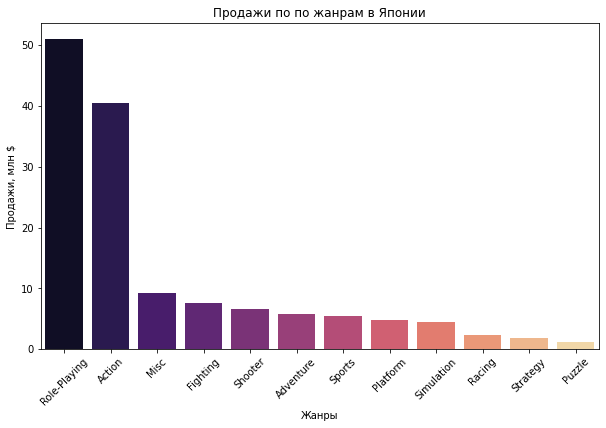

In [63]:
jp_genre_sales = pd.pivot_table(jp_last_games, index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=jp_genre_sales.index, y='jp_sales', data=jp_genre_sales, palette='magma')
plt.title('Продажи по по жанрам в Японии')
plt.xlabel('Жанры')
plt.ylabel('Продажи, млн $')
plt.xticks(rotation=45)
plt.show()

Рейтинг жанров:
- Топ 5 по Северной Америке: Action, Shooter, Sports, Role-Playing и Misc
- Топ 5 по Европейскому региону: Action, Shooter, Sports, Role-Playing и Racing
- Топ 5 по Японии: Role-Playing, Action, Misc, Fighting и Shooter

Игроки из Америки и Европы в целом предпочитают схожие жанры игр. В то время как японские игроки более заинтересованы в играх с глубоким сюжетом и смыслом. Несмотря на различия, жанры экшен и шутеры всегда остаются популярными, так как многие поколения выросли на таких играх и наслаждаются ими.

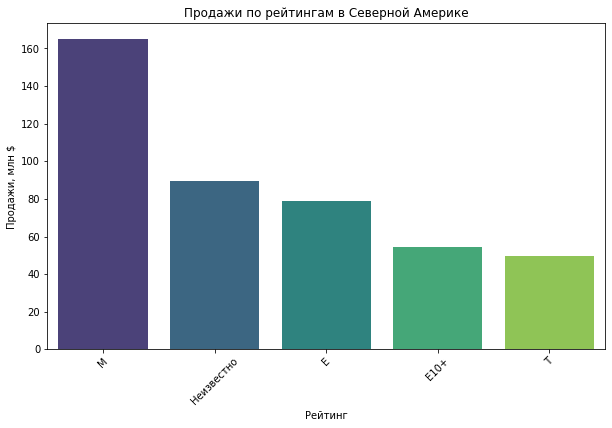

In [64]:
rating_sales = na_last_games.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_sales.index, y='na_sales', data=rating_sales, palette='viridis')
plt.title('Продажи по рейтингам в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, млн $')
plt.xticks(rotation=45)
plt.show()

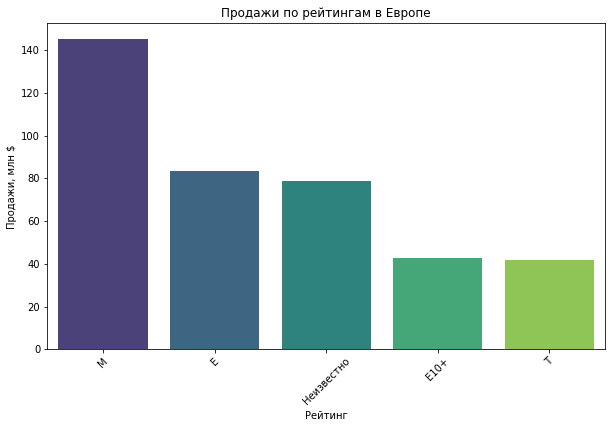

In [65]:
eu_rating_sales = eu_last_games.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=eu_rating_sales.index, y='eu_sales', data=eu_rating_sales, palette='viridis')
plt.title('Продажи по рейтингам в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, млн $')
plt.xticks(rotation=45)
plt.show()

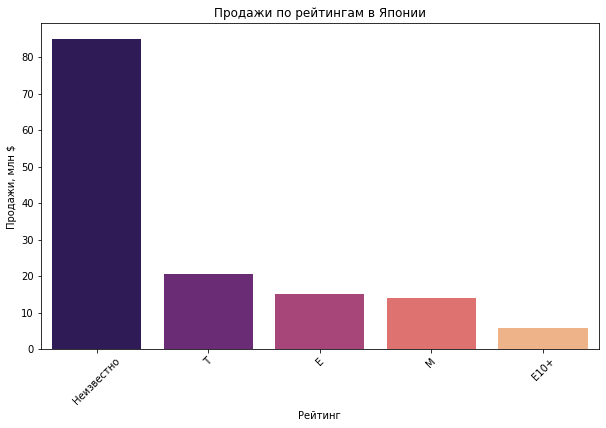

In [66]:
jp_rating_sales = jp_last_games.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=jp_rating_sales.index, y='jp_sales', data=jp_rating_sales, palette='magma')
plt.title('Продажи по рейтингам в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, млн $')
plt.xticks(rotation=45)
plt.show()

Влияние рейтинга возраста заметно в каждом регионе.

В Северной Америке и Европе наиболее популярны игры с рейтингом 17+, что указывает на то, что эти рынки ориентированы на взрослую аудиторию.

В Японии второй по значимости стоят игры с рейтингом для всех. Что говорит о том что япония ориентирована на все аудитории

Однако стоит отметить, что у многих игр неизвестен жанр игр. Поэтому с уверенностью сказать что полученные выводы достоверны, не получится

Большинство игр в Японии, вероятно, не имеют рейтинга ESRB из-за того, что японский рынок видеоигр имеет свою собственную систему рейтингования, которая отличается от системы ESRB, используемой в Северной Америке. В Японии наиболее распространенной системой рейтингования является CERO (Computer Entertainment Rating Organization), которая оценивает игры на основе их контента и предназначена специально для японского рынка. Таким образом, многие игры, выпущенные в Японии, могут не получать рейтинг ESRB, поскольку они не предназначены для аудитории в Северной Америке и не подвергаются оценке этой организацией.

### Вывод по шагу 4
Исследование по различным регионам позволяет сформировать типичный профиль игрока.

Американский игрок, обычно старше 17 лет, предпочитает играть на PS4 или XOne. Его предпочтения включают игры, требующие быстрой реакции, а также шутеры.

Европейский игрок также старше 17 лет и предпочитает играть на PS4. Как и американцы, он предпочитает игры, где требуется быстрая реакция, а также шутеры.

Японский игрок может быть любого возраста, но чаще предпочитает играть на портативных платформах, таких как 3DS или PSV. Его предпочтения включают RPG и экшены.

## Шаг 5. Проверка гипотез
Стоит задача проверить две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Перед тем как приступить к проверке гипотезы 1, необходимо подготовить данные, а именно создадим 2 датафрейма для каждой из платформ, не учитывая игры у которых нет информации о пользовательском рейтинге

In [67]:
def statistical_info(series, bins=0):
    series_description = series.describe()
    mean = series_description[1]
    std = series_description[2]
    d_min = series_description[3]
    q1 = series_description[4]
    median = series_description[5]
    q3 = series_description[6]
    d_max = series_description[7]
    left_border = d_min
    right_border = d_max
    
    if bins == 0:
        bins = right_border - left_border
        if bins > 100:
            bins = 100
        elif bins < 1:
            bins = abs(bins * 10) + 1
        bins = int(bins)
    else:
        bins = bins
    
    plt.title('Распределение пользовательской оценки')
    series.hist(bins=bins, range=(left_border, right_border))

    print(series_description)
    
    variance_estimate = np.var(series, ddof=1)
    standard_deviation = np.std(series, ddof=1)
    
    print('Среднее значение: {:.2f}'.format(mean))
    print('Дисперсия: {:.2f}'.format(variance_estimate))
    print('Стандартное отклонение: {:.2f}'.format(standard_deviation))
    
    return [mean, variance_estimate, standard_deviation]

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Но есть же встроенные функции, которые считают перечисленные метрики.  </div>

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64
Среднее значение: 6.52
Дисперсия: 1.91
Стандартное отклонение: 1.38


[6.521428571428572, 1.9069968429360695, 1.380940564592144]

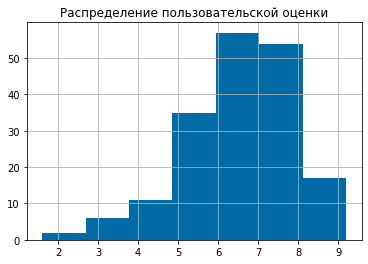

In [68]:
last_games_XOne = last_games.query('platform == "XOne"')['user_score'].dropna()
statistical_info(last_games_XOne)

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64
Среднее значение: 6.27
Дисперсия: 3.04
Стандартное отклонение: 1.74


[6.2696774193548395, 3.035892752408882, 1.7423813452883619]

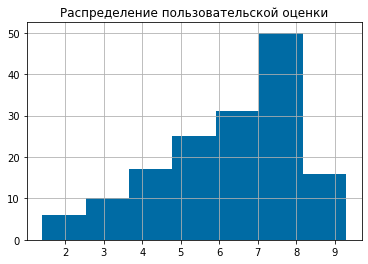

In [69]:
last_games_PC = last_games.query('platform == "PC"')['user_score'].dropna()
statistical_info(last_games_PC)

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 
    
Кстати, можно не удалять пропуски из сравниваемых выборок, а передать в ttest_ind аргумент nan_policy с нужным значением, тогда они будут игнорироваться. Подробнее можно почитать [здесь](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) </div>

Средние пользовательские рейтинги для платформ Xbox One и PC кажутся схожими на первый взгляд, однако дисперсия выборок отличается.

Нулевая гипотеза звучит так: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Альтернативная гипотеза формулируется так: "Средние пользовательские рейтинги платформ Xbox One и PC различаются".

Для проверки гипотезы используется тест Стюдента. Мы можем получить два возможных ответа: "Отвергаем нулевую гипотезу" или "Не получилось отвергнуть нулевую гипотезу".

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Здорово, что формулируешь гипотезы перед проверкой </div>

In [70]:
alpha = 0.01

res = st.ttest_ind(last_games_XOne, last_games_PC)

print('p-значение:', res.pvalue)

if (res.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Мы не можем отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов для Xbox One и PC, что говорит о том, что эти рейтинги, вероятно, не различаются статистически значимо.

Перейдем же ко второй гипотезе (в первую очередь подготовим данные)

<div class="alert alert-block alert-danger">
<b>❌Комментарий ревьюера:</b> 
    
Мы не можем подтвердить нулевую гипотезу и сказать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые (выше мы убедились, что они разные). Мы лишь говорим ,что не можем отвергнуть нулевую гипотезу и что с большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий. 
</div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий студента:</b> 
    Исправила вывод по гипотезе
</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64
Среднее значение: 6.84
Дисперсия: 1.77
Стандартное отклонение: 1.33


[6.837532133676092, 1.7693609042482705, 1.3301732609883083]

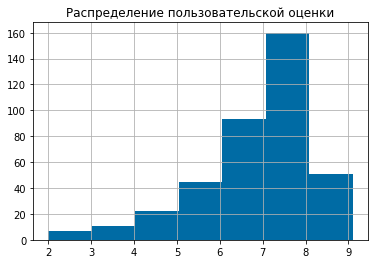

In [71]:
last_games_action = last_games.query('genre == "Action"')['user_score'].dropna()
statistical_info(last_games_action)

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64
Среднее значение: 5.24
Дисперсия: 3.18
Стандартное отклонение: 1.78


[5.238124999999999, 3.180612814465409, 1.7834272663793747]

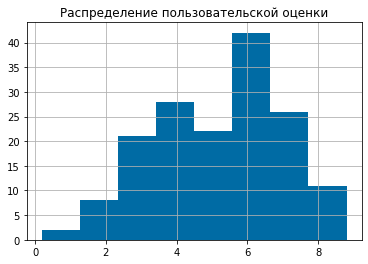

In [72]:
last_games_sports = last_games.query('genre == "Sports"')['user_score'].dropna()
statistical_info(last_games_sports)

Изначально данные по статистике кажутся различными.

Нулевая гипотеза звучит так: "Средние пользовательские рейтинги для жанров Action и Sports одинаковы".

Альтернативная гипотеза: "Средние пользовательские рейтинги для жанров Action и Sports различаются".

Для проверки гипотезы используем тест Стьюдента. Результат теста может быть двух типов: "Отвергаем нулевую гипотезу" или "Не можем отвергнуть нулевую гипотезу".

In [73]:
alpha = .01

res = st.ttest_ind(last_games_action, last_games_sports)

print('p-значение:', res.pvalue)

if (res.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Тест Стьюдента подтвердил, что средние пользовательские рейтинги для жанров Action и Sports различаются

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b>Верно</div>

### Вывод по шагу 5
Первая и вторая гипотезы подтверждены.

Платформа XOne стремится привлечь новых пользователей из года в год, чтобы конкурировать не только с PS4, но и с самой распространенной платформой на планете — PC. Качество игр на XOne к 2016 году приблизилось к компьютерным.

Различия между жанрами Action и Sports обусловлены опытом создания игр. Первые экшены появились в 80-х годах и с каждым годом становятся все более увлекательными, имея на что опираться в прошлом. В то время как у спортивных игр часто ограниченные возможности в инновациях из-за стремления к симуляции реальных спортивных мероприятий. Любители этого жанра иногда сталкиваются с непонятными решениями разработчиков в этих играх.

## Общие выводы:
Предметом исследования является интернет-магазин "Стримчик". Магазин продает компьютерные игры по всему миру. Необходимо было выявить ключевые факторы, определяющие успех игры. Это поможет сделать ставку на потенциально популярные продукты и разработать эффективные стратегии маркетинга на 2017 год. Однако прежде чем приступать к исследованию, были предприняты шаги по ознакомлению и предобратке данных
После ознакомления было выявлено: 
1. Пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Эти пропуски могут быть вызваны разными факторами, такими как отсутствие информации, ошибки при сборе данных или несовершенства в базе данных.
2. Аномалия "tbd" (to be defined) в столбце User_Score. Это означает, что оценка пользователей еще не определена или недоступна на момент сбора данных. Это нормальное явление для компьютерных игр, поскольку оценка может быть получена только после того, как игра будет оценена достаточным количеством пользователей.
3. Неправильный тип данных в столбце Year_of_Release. Год выпуска игры должен быть целым числом, что требует коррекции типа данных. Также неправильный тип данных имеет колонка User_Score (но это связано с аномалией tbd, что мы скорректируем в будущем), а также колонка critic_score (Потому что судя по уникальным значениям, все значения целочисленные и не требуют вещественный тип данных)
4. Обнаружены две строки с пропусками в столбцах Name и Genre (строки 659 и 14244), при этом информация о годе и платформе указывает на то, что это одна и та же игра. Вероятно, данные о продажах были получены только для определенных регионов, что привело к разделению информации на две строки.
5. Обнаружено аномальное значение для платформы DS

После предобработки данных данные пункты были устранены, где это было возможно

После исследования данных удалось обнаружить, что:
1. С 1980-х до 1993 года индустрия компьютерных игр была маломасштабной, без достаточного внимания качества и оценок. Появление персональных компьютеров и новых технологий программирования привело к увеличению выпуска игр с 1997 по 2002 годы. В 2009 году произошел пик интереса, благодаря распространению игровых движков и доступности новых технологий. Снижение активности с 2012 по 2016 год обусловлено экономическим кризисом и стремлением крупных студий к созданию качественных продуктов.
2. В среднем консоли проживают около 10 лет. Однако они могли бы существовать дольше, если бы не появлялись новые модели. Это естественный процесс, так как с течением времени аппаратное обеспечение устаревает и не может обеспечить выполнение новых технических требований игр.
Для последующего анализа был выбран промежуток с 2013 по 2016 год
3. Топ-5 платформ по мировым продажам включает в себя PS4, PS3, XOne, X360 и 3DS. За последние три года их общая выручка составила около 1 миллиарда долларов.
4. Продажи растут для PS4, XOne, 3DS, WiiU и PSV, поскольку они заменяют предыдущее поколение игровых консолей. С другой стороны, продажи старых платформ, таких как PS3, X360, DS, Wii и PSP, снижаются. Также можно отметить увеличение продаж игр для ПК
5. В период с 2013 по 2016 годы заметна значительная разница в продажах игр. Несколько крайне популярных игр продаются долгое время, принося значительную прибыль, в то время как большинство игр не преодолевают порог в 400 тысяч долларов за выбранный период.
6. Средняя выручка на одну игру по всему миру составляет 488 тысяч долларов. Три четверти игр принесли менее 400 тысяч долларов, а рекордная выручка составила 21 миллион долларов.
7. Мнение игроков часто зависит от оценки критиков. То есть, чем выше рейтинг критиков, тем выше вероятность того, что игроки также высоко оценят игру.
8. Наиболее прибыльными жанрами игр являются Shooter, Sports и Platform, в то время как жанры Puzzle и Adventure приносят меньше всего дохода.

Также были подтверждены 2 гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Рекомендации на 2017 год:
1. Сосредоточиться на консоли нового поколения: Учитывая растущий интерес к PS4 и XOne, стоит уделить особое внимание играм для этих платформ. Разработка эксклюзивных игр для PS4 и XOne может привлечь больше пользователей и увеличить прибыль.
2. Обратить внимание на жанры с высоким потенциалом: Экшен, шутеры, спортивные и ролевые игры показали себя как наиболее прибыльные жанры. Инвестирование в разработку и маркетинг игр этих жанров может привести к увеличению выручки.
3. Учесть влияние оценок критиков: Высокие оценки критиков имеют положительное влияние на мнение игроков. Следовательно, стоит уделять внимание качеству и содержанию игр, чтобы получить высокие оценки критиков, что в свою очередь может привести к увеличению продаж.
4. Обеспечить разнообразие и качество: Несмотря на то, что определенные жанры и платформы могут быть более прибыльными, важно также уделять внимание разнообразию игрового ассортимента и качеству выпускаемых игр. Успешное сочетание различных жанров и платформ может привлечь более широкую аудиторию и обеспечить долгосрочный успех.
5. Адаптировать стратегии к новым тенденциям: Стремительное развитие технологий и изменения во вкусах потребителей могут привести к изменениям в индустрии компьютерных игр. Постоянное наблюдение за тенденциями и гибкость в адаптации стратегий помогут оставаться конкурентоспособным на рынке.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> 
    
Хороший резюмирующий вывод! Молодец, что не забыла дать рекомендации на 2017 год. 


**Хочу обратить твое внимание на то, что после исправления замечаний в некоторых пунктах исследования могут измениться результаты, поэтому нужно будет подкорректировать выводы.**</div>